# **Aim:** To predict emotions from a text using Neural Networks

## EDA

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from warnings import filterwarnings
import seaborn as sns
from nltk.corpus import stopwords
stop = stopwords.words('english')
from collections import Counter
from sklearn.metrics import accuracy_score,r2_score
import re
import string
from wordcloud import WordCloud,STOPWORDS
import tensorflow as tf
from tensorflow import keras
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import pickle
filterwarnings("ignore")

2022-04-24 17:45:19.147969: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-24 17:45:19.147992: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Initializing Dataset

In [2]:
df = pd.read_csv("training.csv")

In [3]:
#dropping 1st column
df.drop("Unnamed: 0",axis = 1, inplace = True)

In [4]:
# Finding length of each tweet
df["Length"] = df["Tweet"].str.len()

In [5]:
df

Tweet   Emotion  Length
0      Vet VeChain Vefam start voting #BTC #cryptocur...  Surprise      51
1      Cryptocurrencies are going to disappoint all t...       Joy     257
2      @TheRealGeigs Yes I did I think BTC going for ...       Joy     118
3      Sunday #crypto charting Any frens wanna share ...       Joy     213
4      Petty invectives against wasabi aside, this is...      Fear     142
...                                                  ...       ...     ...
20685  @HoppersGame @Avalanche_Space @apa_nft @avalan...       Joy     181
20686  @80sCruiser been thinking about moving most of...   Sadness      93
20687             @Louverture_fi 0.13 AVAX fee?! Really?   Sadness      38
20688  #Avalanche Stats  #AVAX Price $ 70.57 CMC Rank...       Joy     183
20689   Ant #2947 (uncommon) - Colony Stage: 5 - Sold...       Joy      66

[20690 rows x 3 columns]

### Visualizing Counts of Each Class

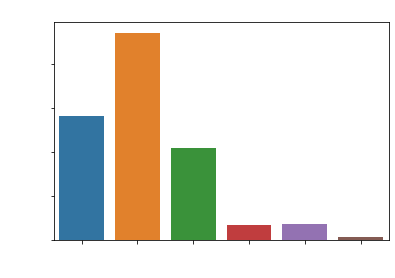

In [6]:
fig = plt.figure()
plt.title("Bargraph of Emotion and Their count",color = "White")
sns.countplot(df['Emotion'])
plt.xlabel("Emotion",color = "white")
plt.ylabel("Counts",color = "white")
plt.xticks(color = "white")
plt.yticks(color = "white")
plt.savefig("Bargraph of Emotion and Their count.png")
plt.show()

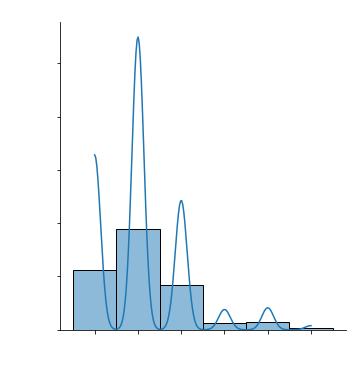

In [7]:
sns.displot(df['Emotion'],kde=True)
plt.title("Histogram of Emotion and Their count",color = "White")
plt.xlabel("Emotion",color = "white")
plt.ylabel("Counts",color = "white")
plt.xticks(color = "white")
plt.yticks(color = "white")
plt.savefig("Histogram of Emotion and Their count.png")
plt.show()

In [8]:
#Defining function to remove "#" and "@" 
def clean_tweet(i):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            i = i.replace(separator,' ')
    words = []
    for word in i.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

In [9]:
#Removing Hashtags and "@"
for i in range(0,len(df)):
    df["Tweet"][i] = clean_tweet(df["Tweet"][i])

In [10]:
#Removing "$"
df["Tweet"] = df["Tweet"].str.replace("$","")

In [11]:
#Converting everything into small case
df['Tweet'] = df['Tweet'].map(lambda text:re.sub('[^a-zA-Z0-9]+', ' ',text)).apply(lambda x: (x.lower()))

In [12]:
#Removing Emojis
df = df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

In [13]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df["Tweet"] = df['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [14]:
#Removing the unwanted noise which are not digits or alphabets
df['Tweet'] = df['Tweet'].str.replace('\d+', '')

In [15]:
#Splitting the dataframe into emotion wise dataframes
df1 = df[df["Emotion"] == "Joy"]
df2 = df[df["Emotion"] == "Surprise"]
df3 = df[df["Emotion"] == "Fear"]
df4 = df[df["Emotion"] == "Sadness"]
df5 = df[df["Emotion"] == "Anger"]
df6 = df[df["Emotion"] == "Disgust"]

### Plotting Wordcloud

In [16]:
li = [df1,df2,df3,df4,df5,df6] #Declared a list to iterate over dataframes

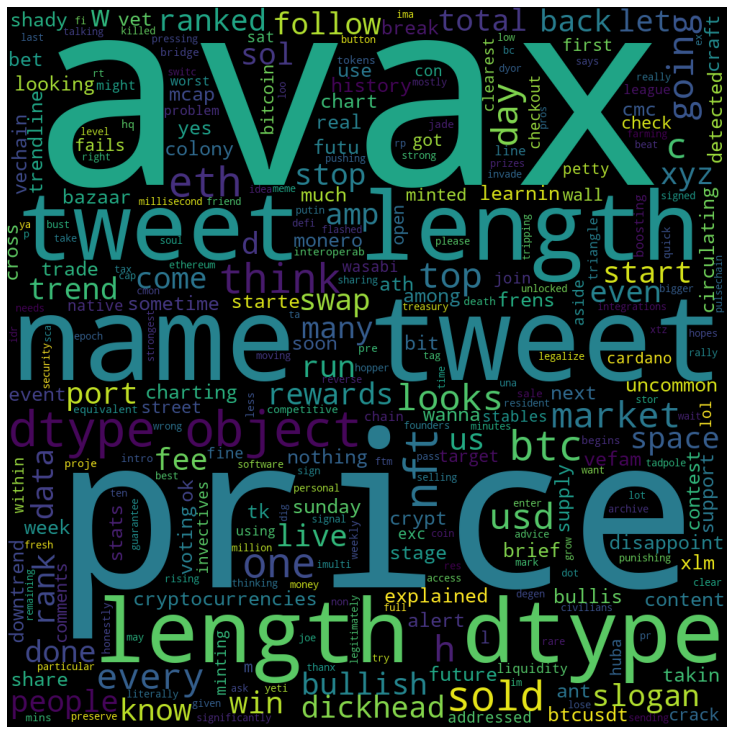

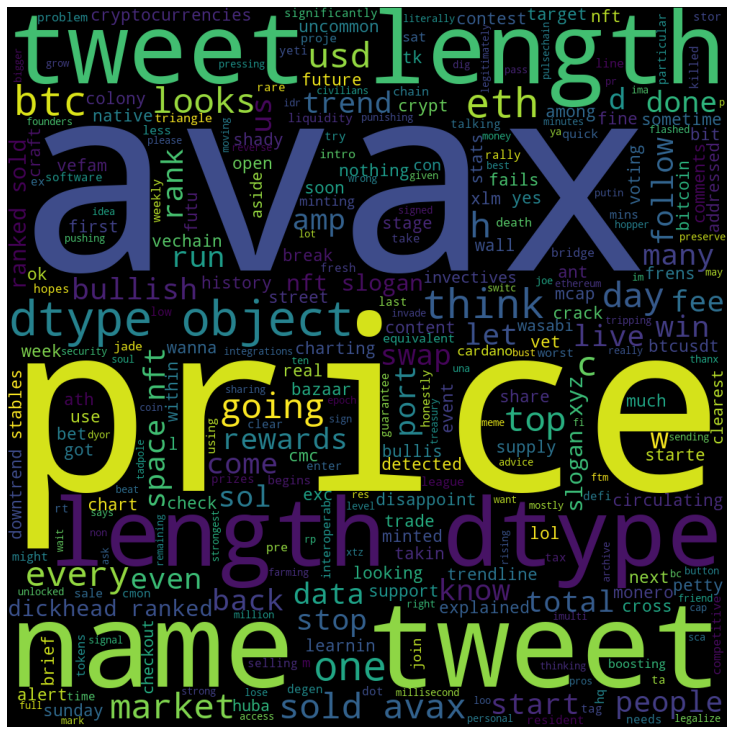

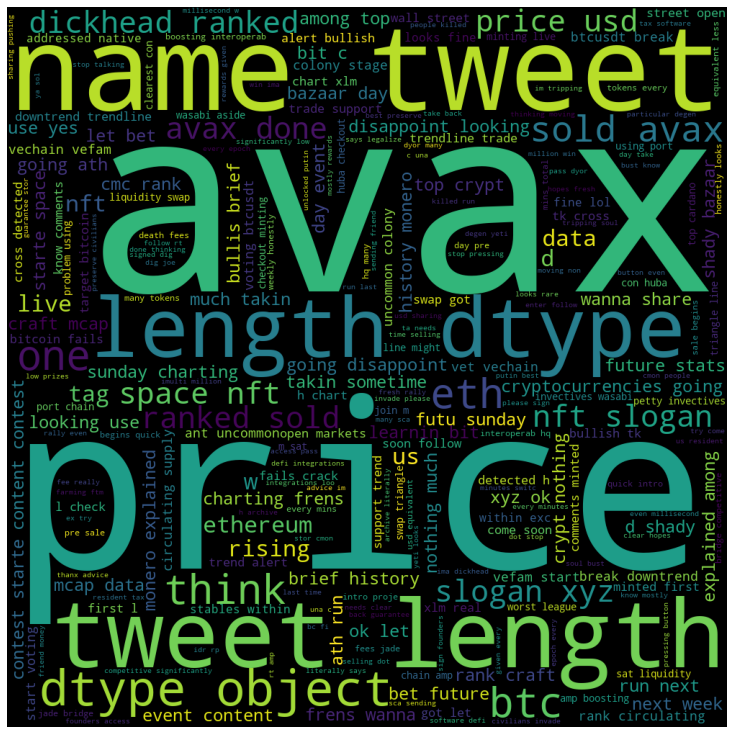

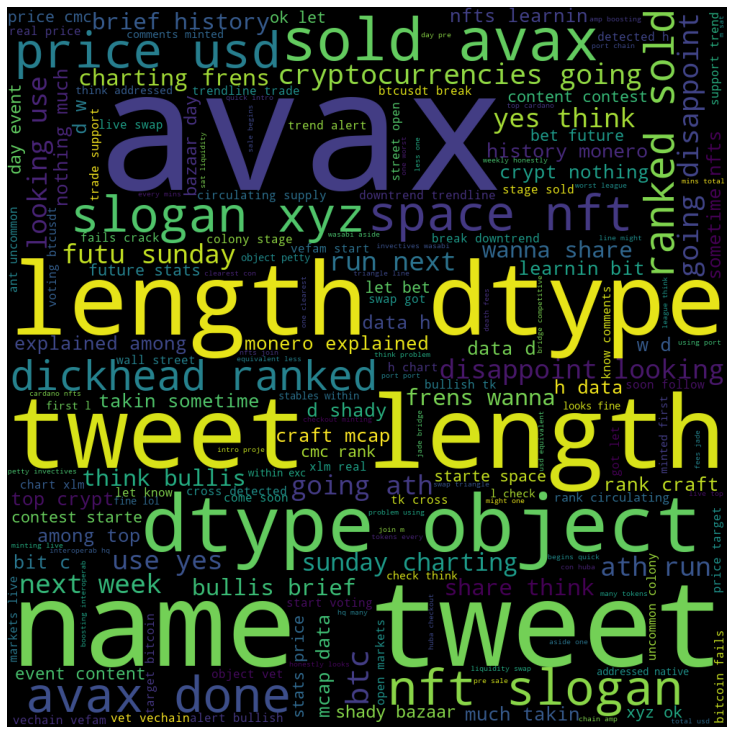

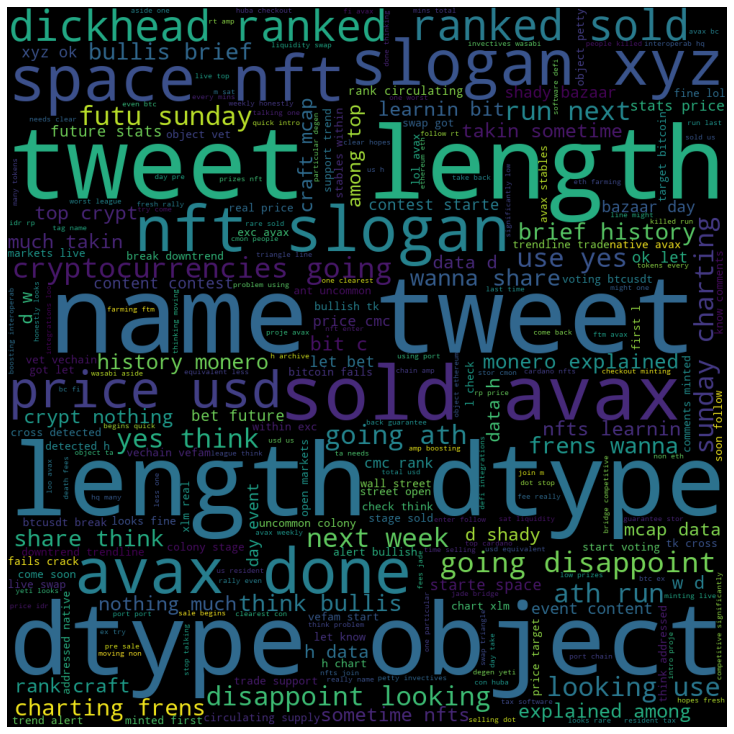

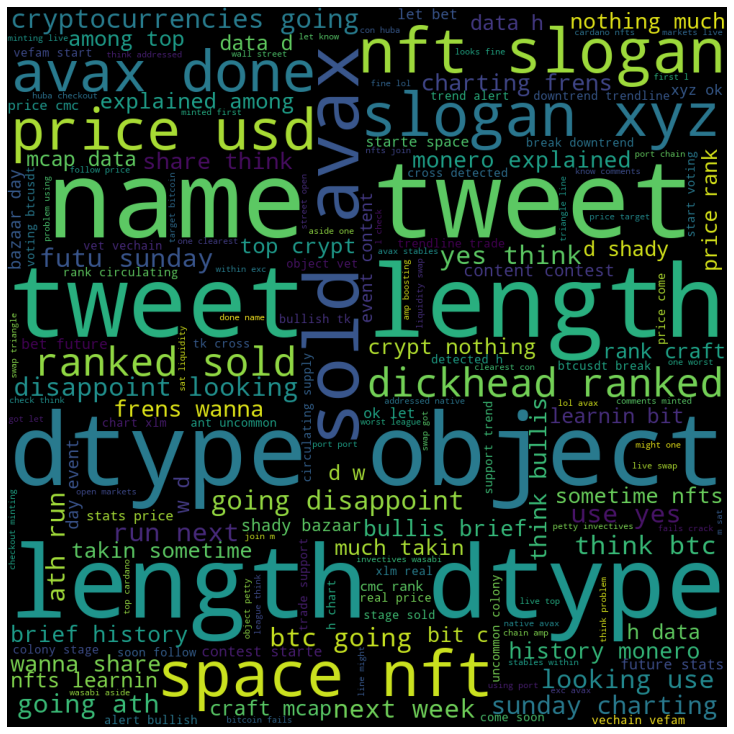

In [17]:
comment_words = ''
stopwords = set(STOPWORDS)
for j in range(6):
    for data in li:
        val = data["Tweet"]
        # typecasting each value to string
        val = str(val)
        # split the value
        tokens = val.split()
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 1000, height = 1000,
                    background_color ='black',
                    max_words=1000000,
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plot the WordCloud image                      
    plt.figure(figsize = (10, 10), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    savename = "wordcloud"+str(j)+".png"
    plt.savefig(savename)
    plt.show()

In [18]:
c1 = Counter(" ".join(df1["Tweet"]).split()).most_common()
c2 = Counter(" ".join(df2["Tweet"]).split()).most_common()
c3 = Counter(" ".join(df3["Tweet"]).split()).most_common()
c4 = Counter(" ".join(df4["Tweet"]).split()).most_common()
c5 = Counter(" ".join(df5["Tweet"]).split()).most_common()
c6 = Counter(" ".join(df6["Tweet"]).split()).most_common()

In [19]:
li = [df1,df2,df3,df4,df5,df6]
for i in li:
    print(len(i))

9414
5620
4163
708
652
133


#### Finding Out Common Words between Dataframes

In [20]:
c1_2 = []
c3_4 = []
c5_6 = []
c1_2_and_c3_4 = []
c3_4_and_c5_6 = []
finalcommon = []

In [21]:
c1_2 = set(c1)&set(c2) 
c3_4 = set(c3)&set(c4)
c5_6 = set(c5)&set(c6)

c1_2final = sorted(c1_2)
c3_4final = sorted(c3_4)
c5_6final = sorted(c5_6)

In [22]:
c1_2_and_c3_4 = set(c1_2)&set(c3_4)
c3_4_and_c5_6 = set(c3_4)&set(c5_6)

c1_2_and_c3_4final = sorted(c1_2_and_c3_4)
c3_4_and_c5_6final = sorted(c3_4_and_c5_6)

In [23]:
c1_2_and_c5_6 = set(c1_2)&set(c5_6)
c1_2_and_c5_6final = sorted(c1_2_and_c5_6)

In [24]:
finalcommon = set(c1_2_and_c3_4)&set(c3_4_and_c5_6)
final = sorted(finalcommon)

#### Saving The lists into dataframes

In [25]:
c1_2_final_df = pd.DataFrame(c1_2final)

In [26]:
pd.DataFrame(c1_2final).to_csv("Common Words between Joy and Suprise.csv",index=["Words","Count"]) 
pd.DataFrame(c3_4final).to_csv("Common Words between Fear and Sadness.csv")
pd.DataFrame(c5_6final).to_csv("Common Words between Anger and Disgust.csv")
pd.DataFrame(c1_2_and_c3_4final).to_csv("Common Words between Joy,Suprise and Fear,sadness.csv")
pd.DataFrame(c3_4_and_c5_6final).to_csv("Common Words between Fear,sadness and Anger,Disgust.csv")
pd.DataFrame(final).to_csv("common of all.csv")

In [27]:
#Names of dataframes
li2 = ["common of all",
      "Common Words between Anger and Disgust",
      "Common Words between Fear and Sadness",
     "Common Words between Fear,sadness and Anger,Disgust",
     "Common Words between Joy and Suprise",
     "Common Words between Joy,Suprise and Fear,sadness"]

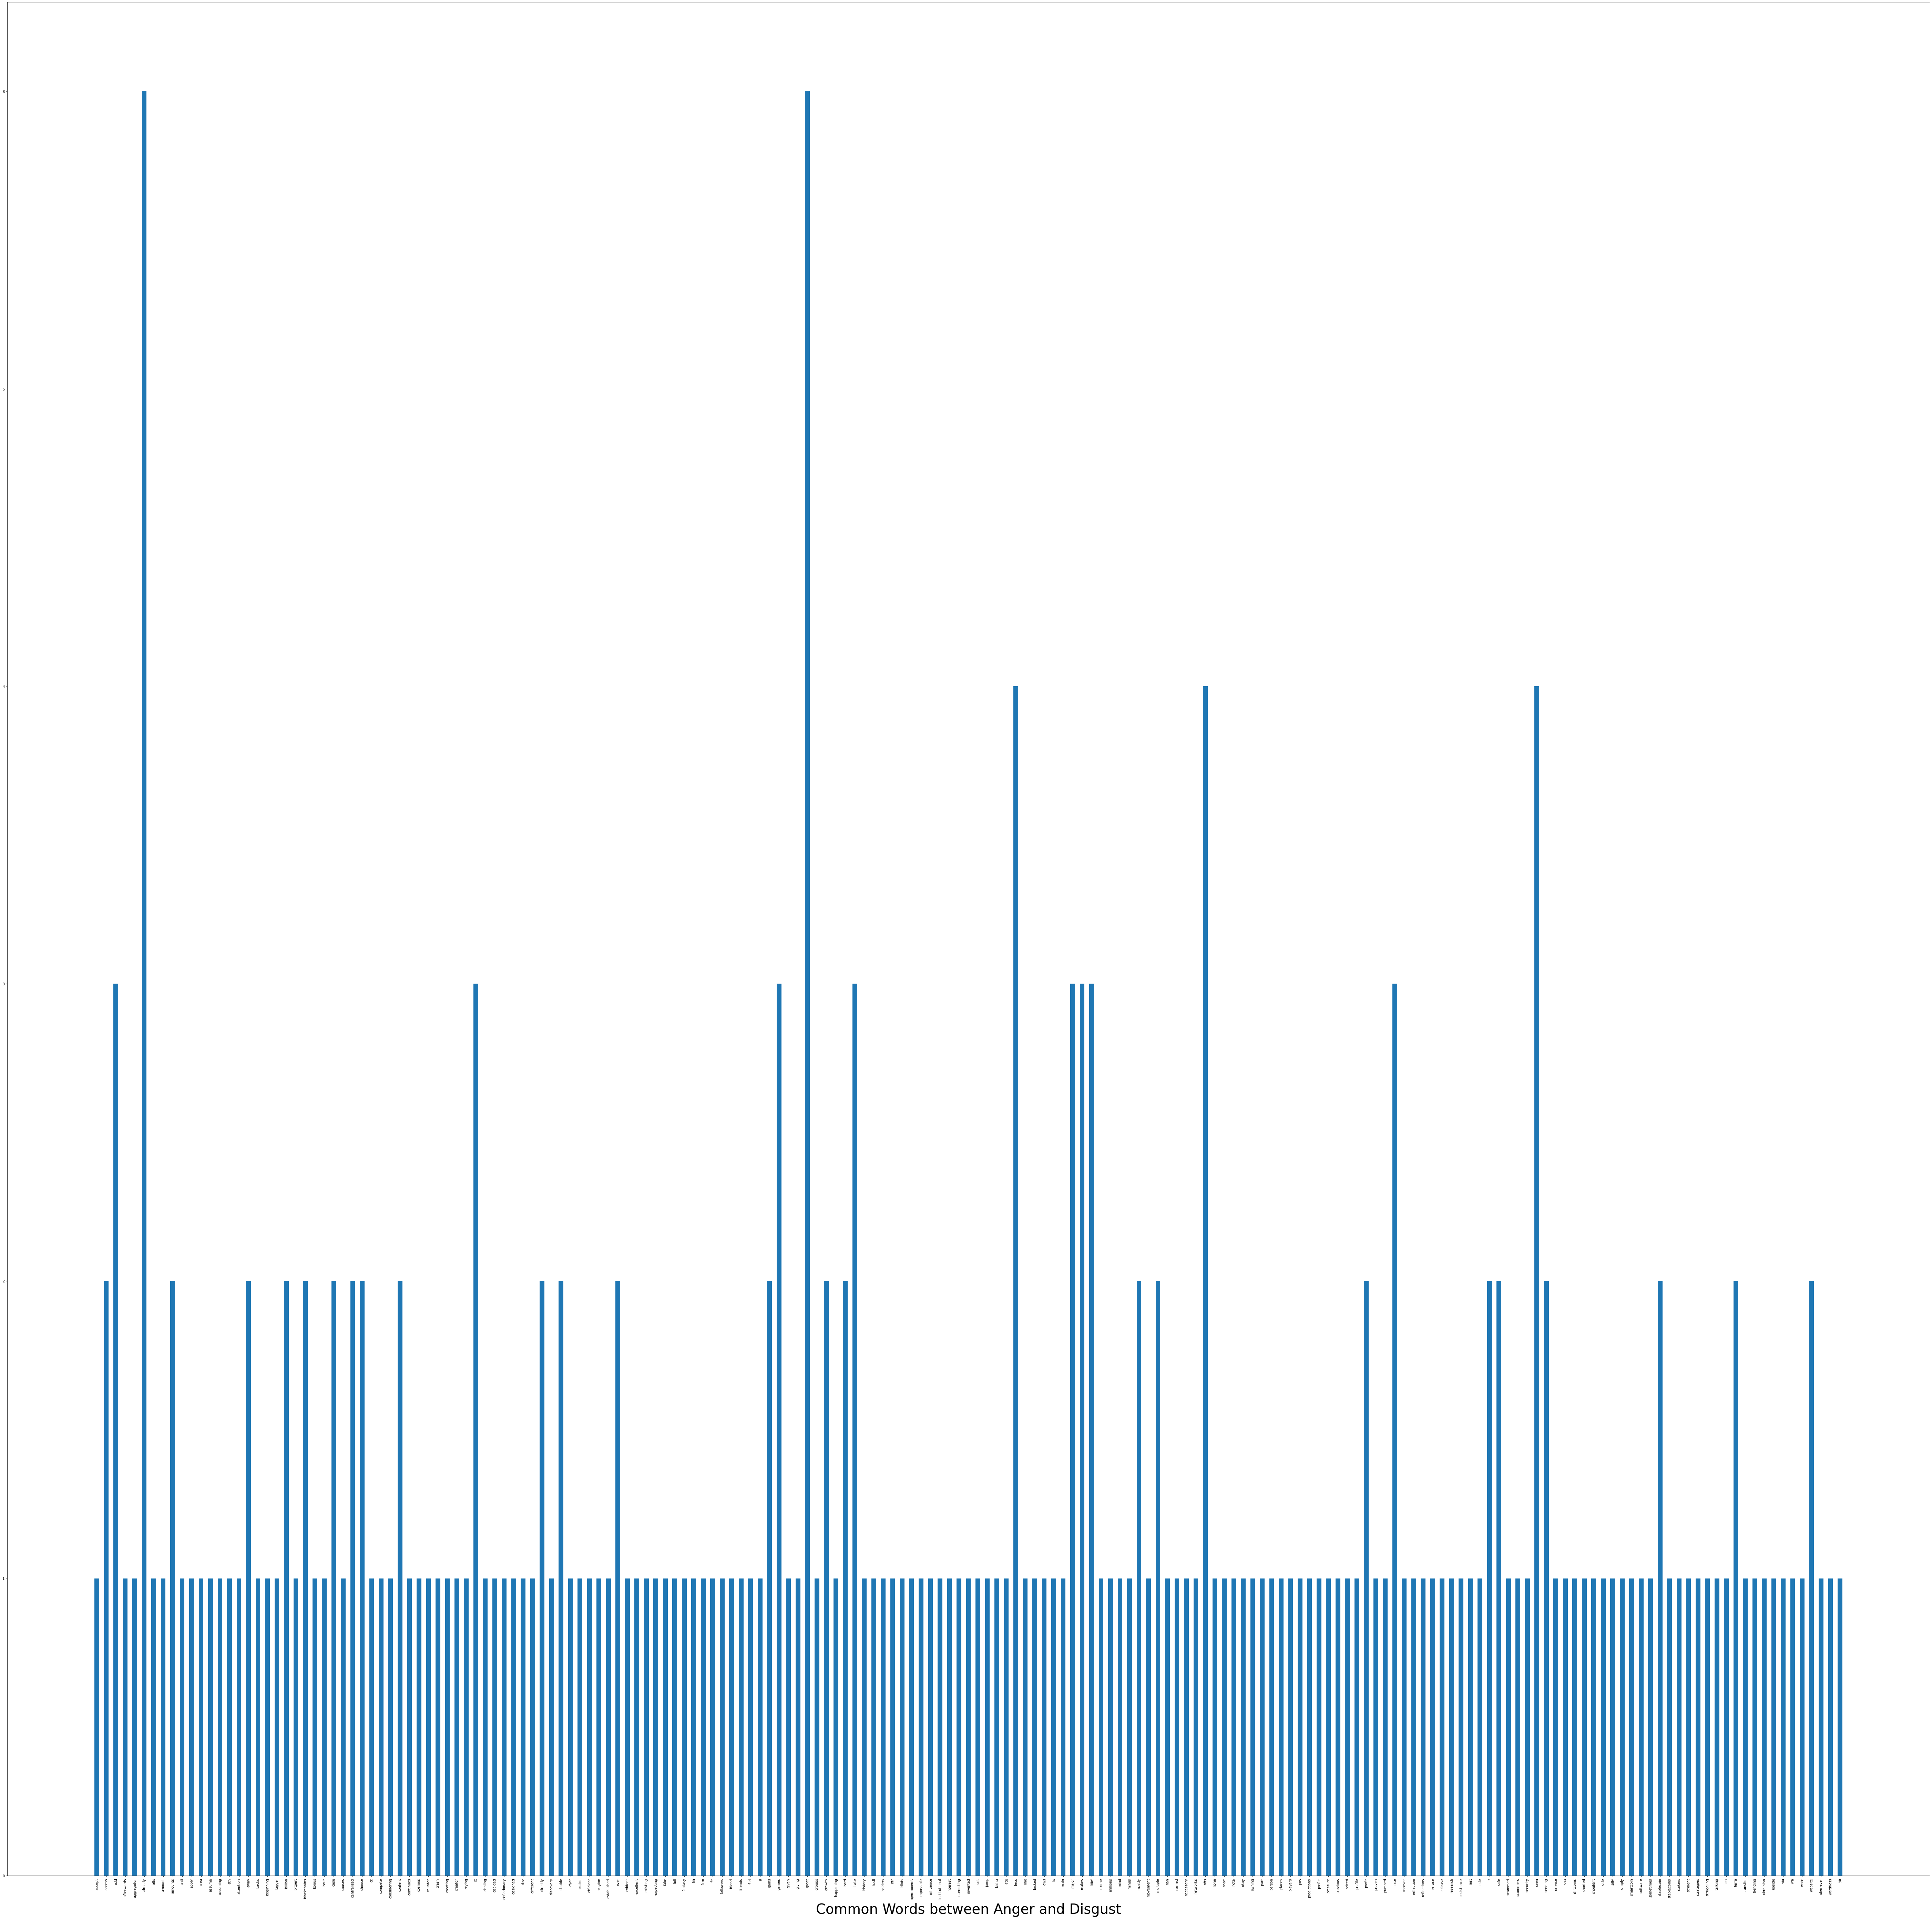

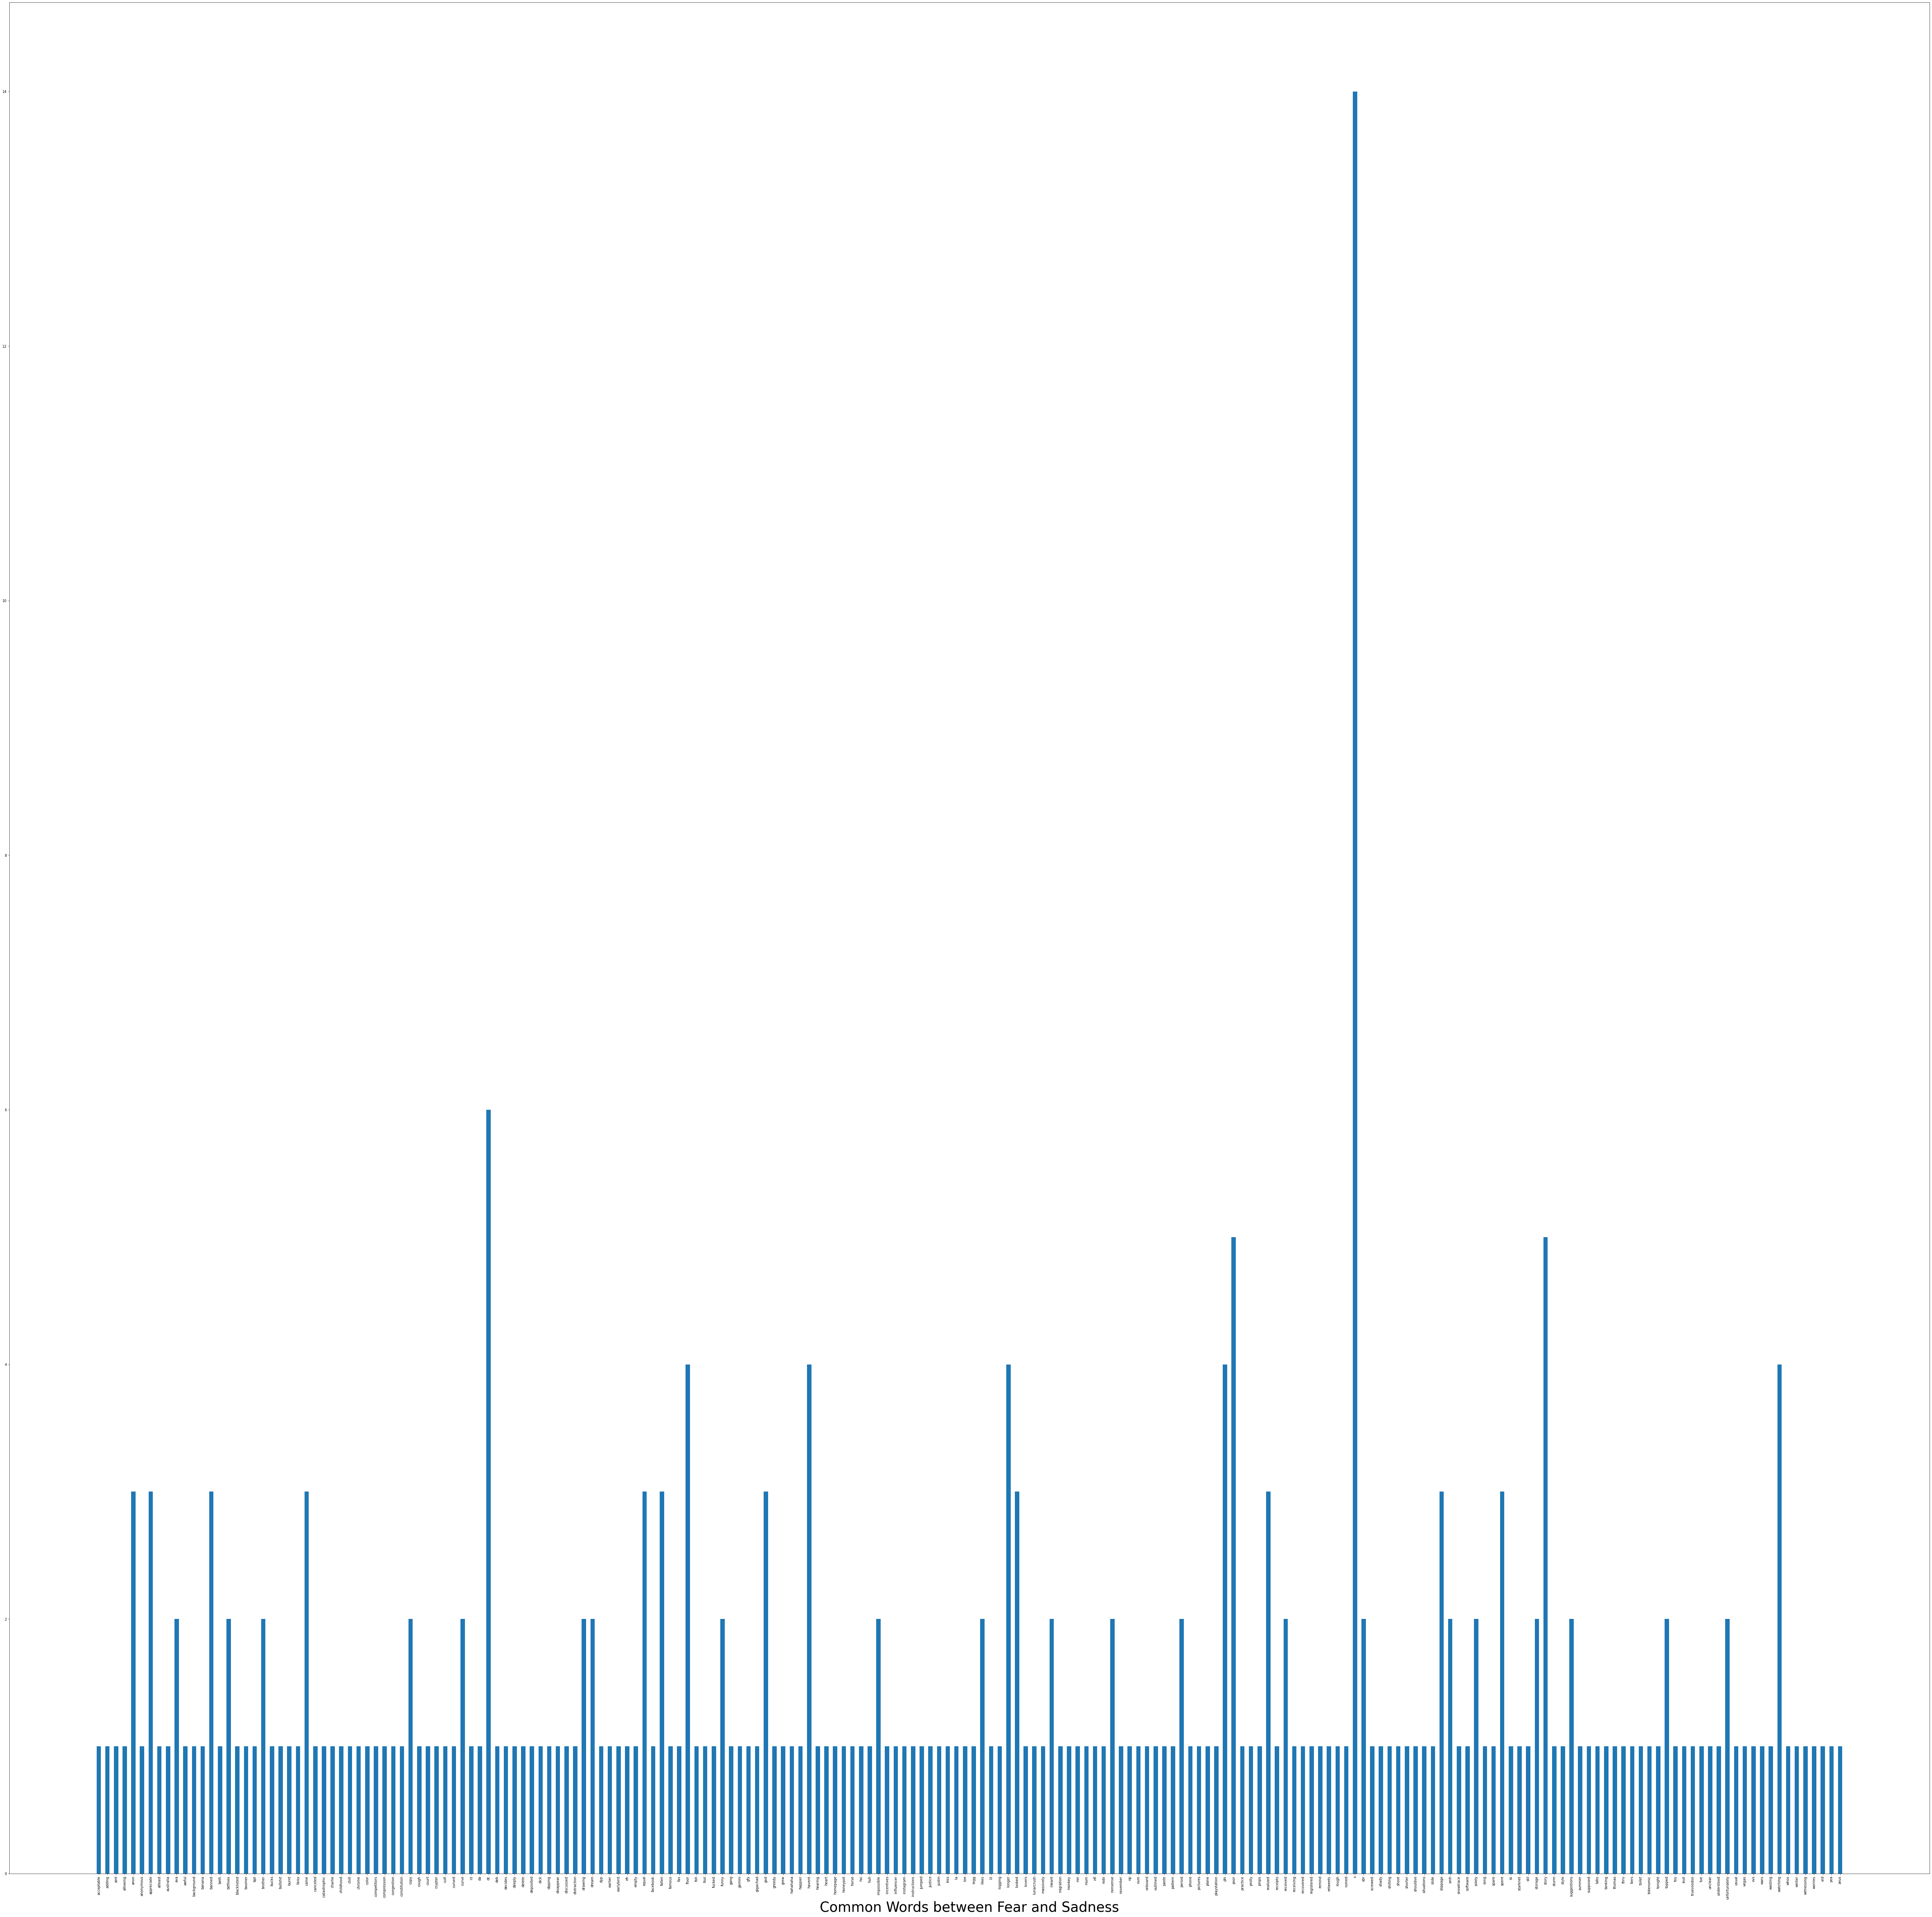

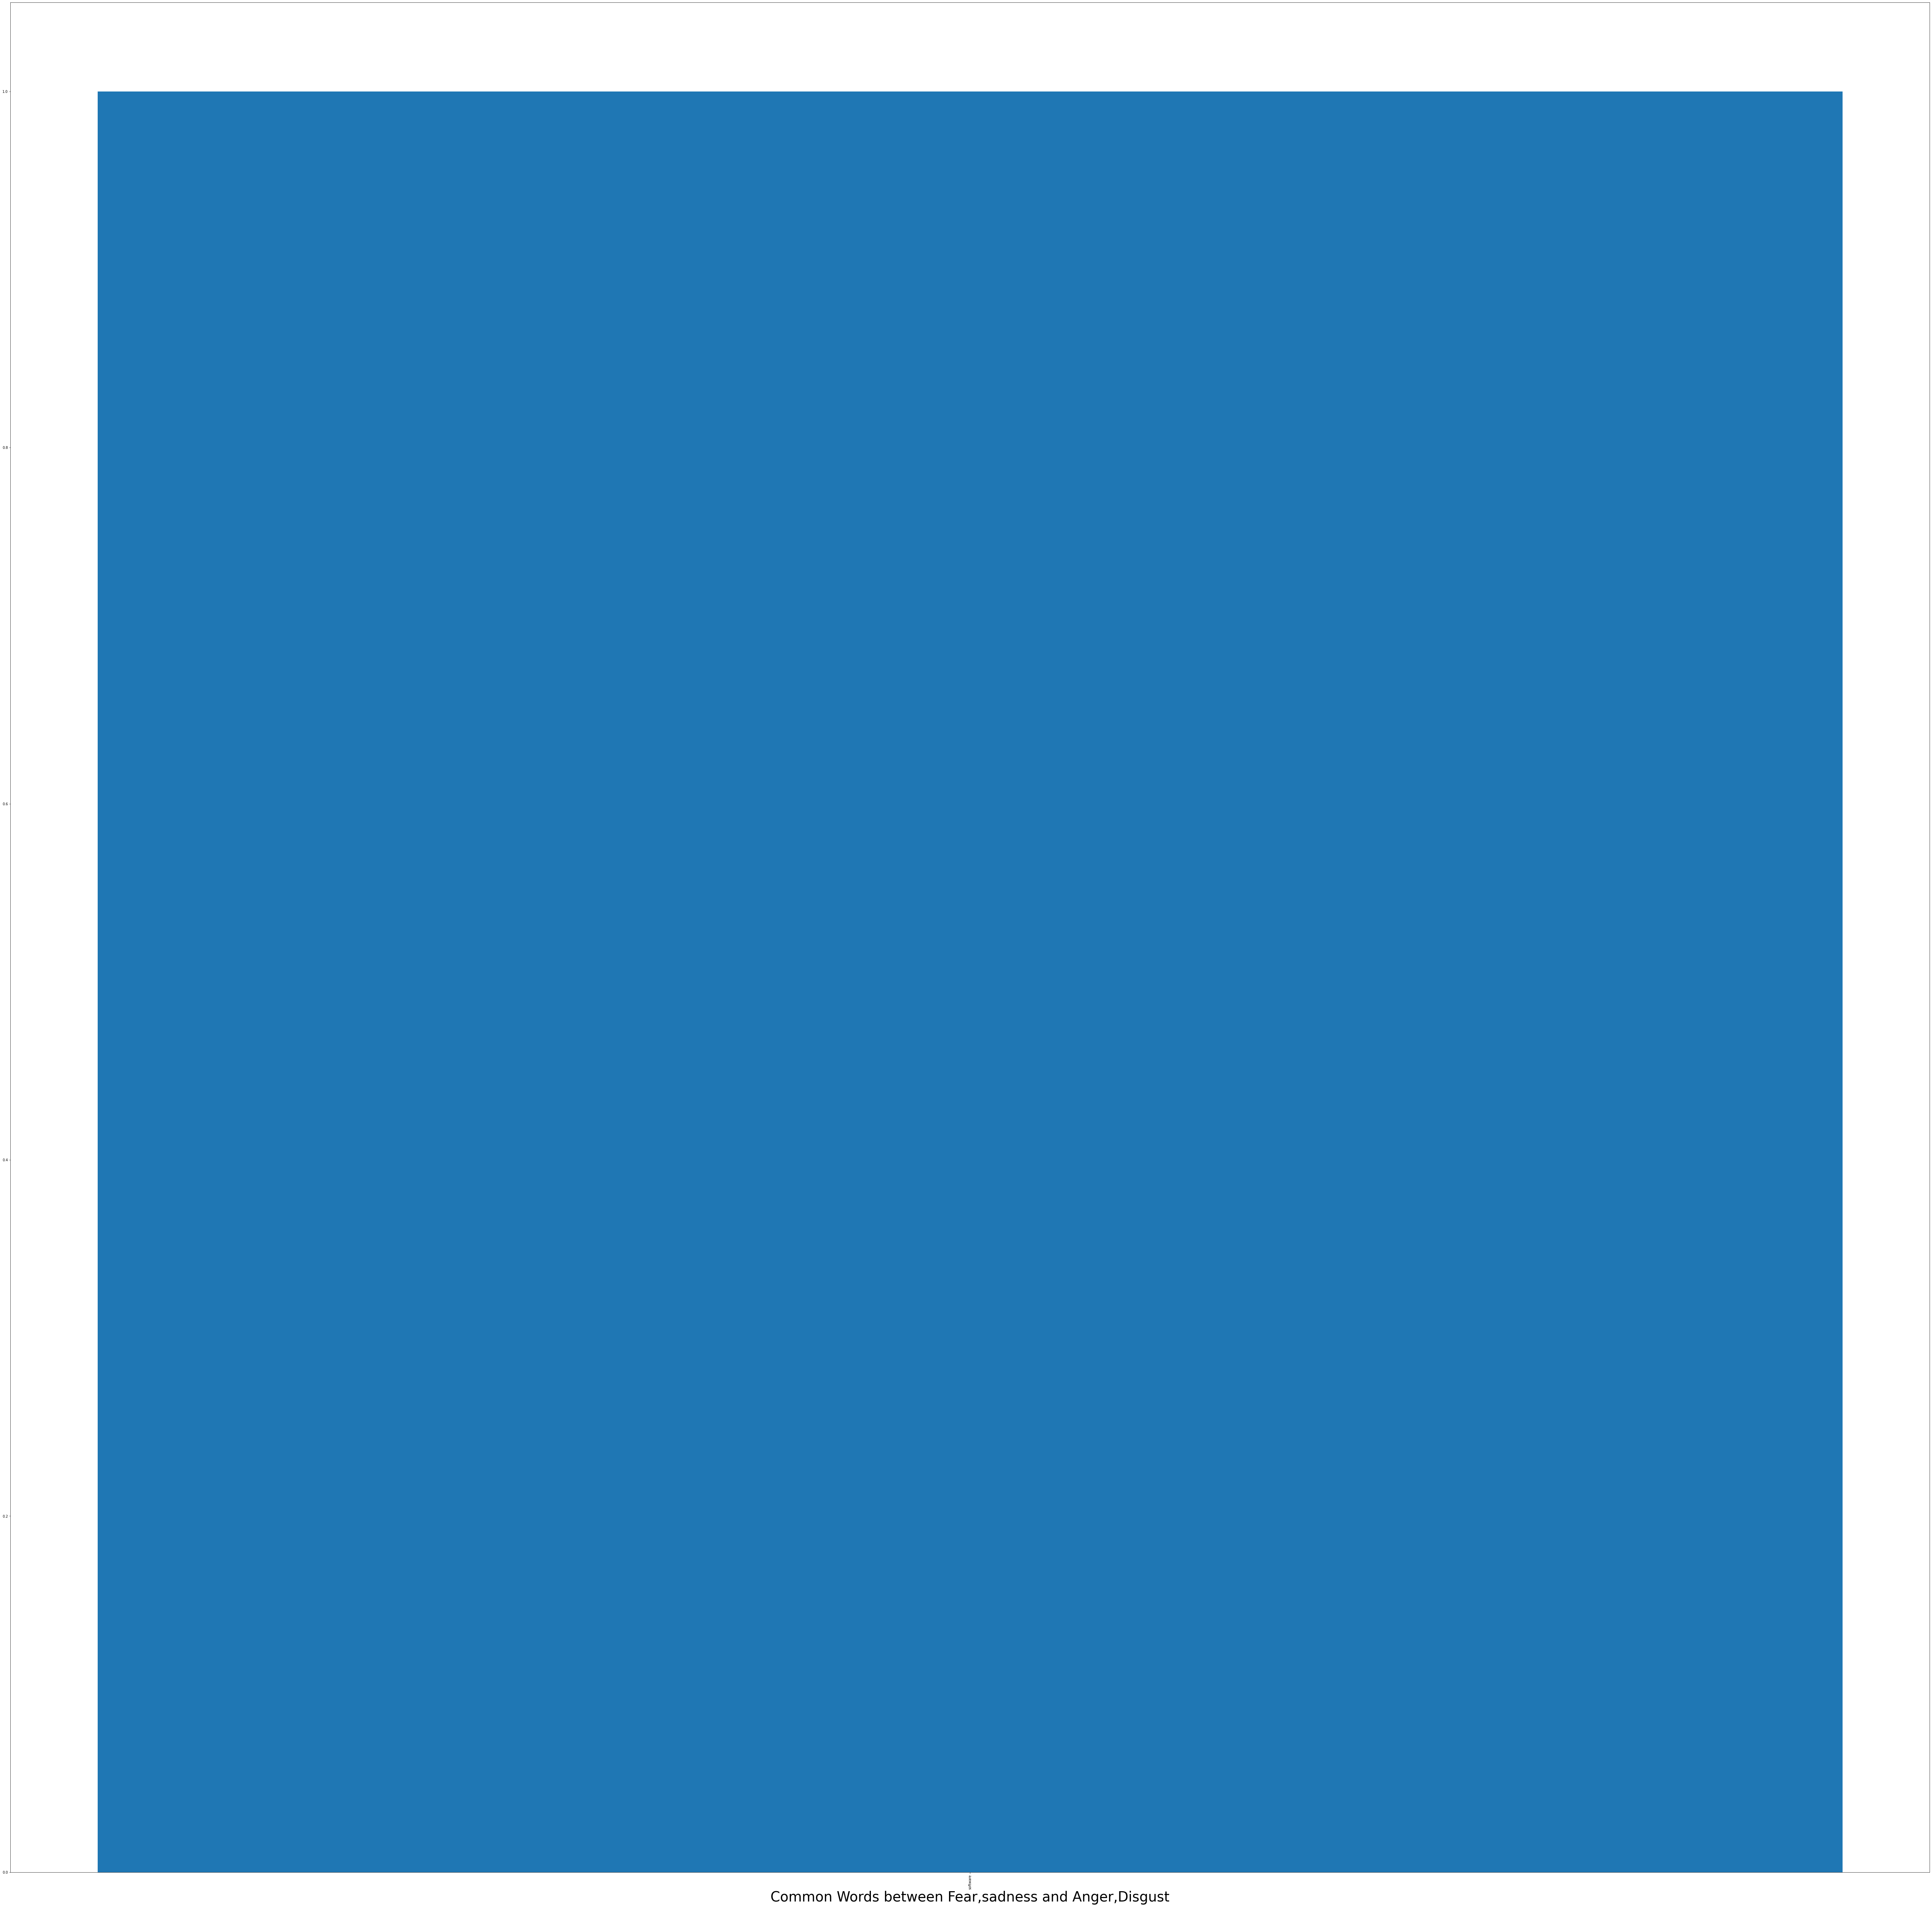

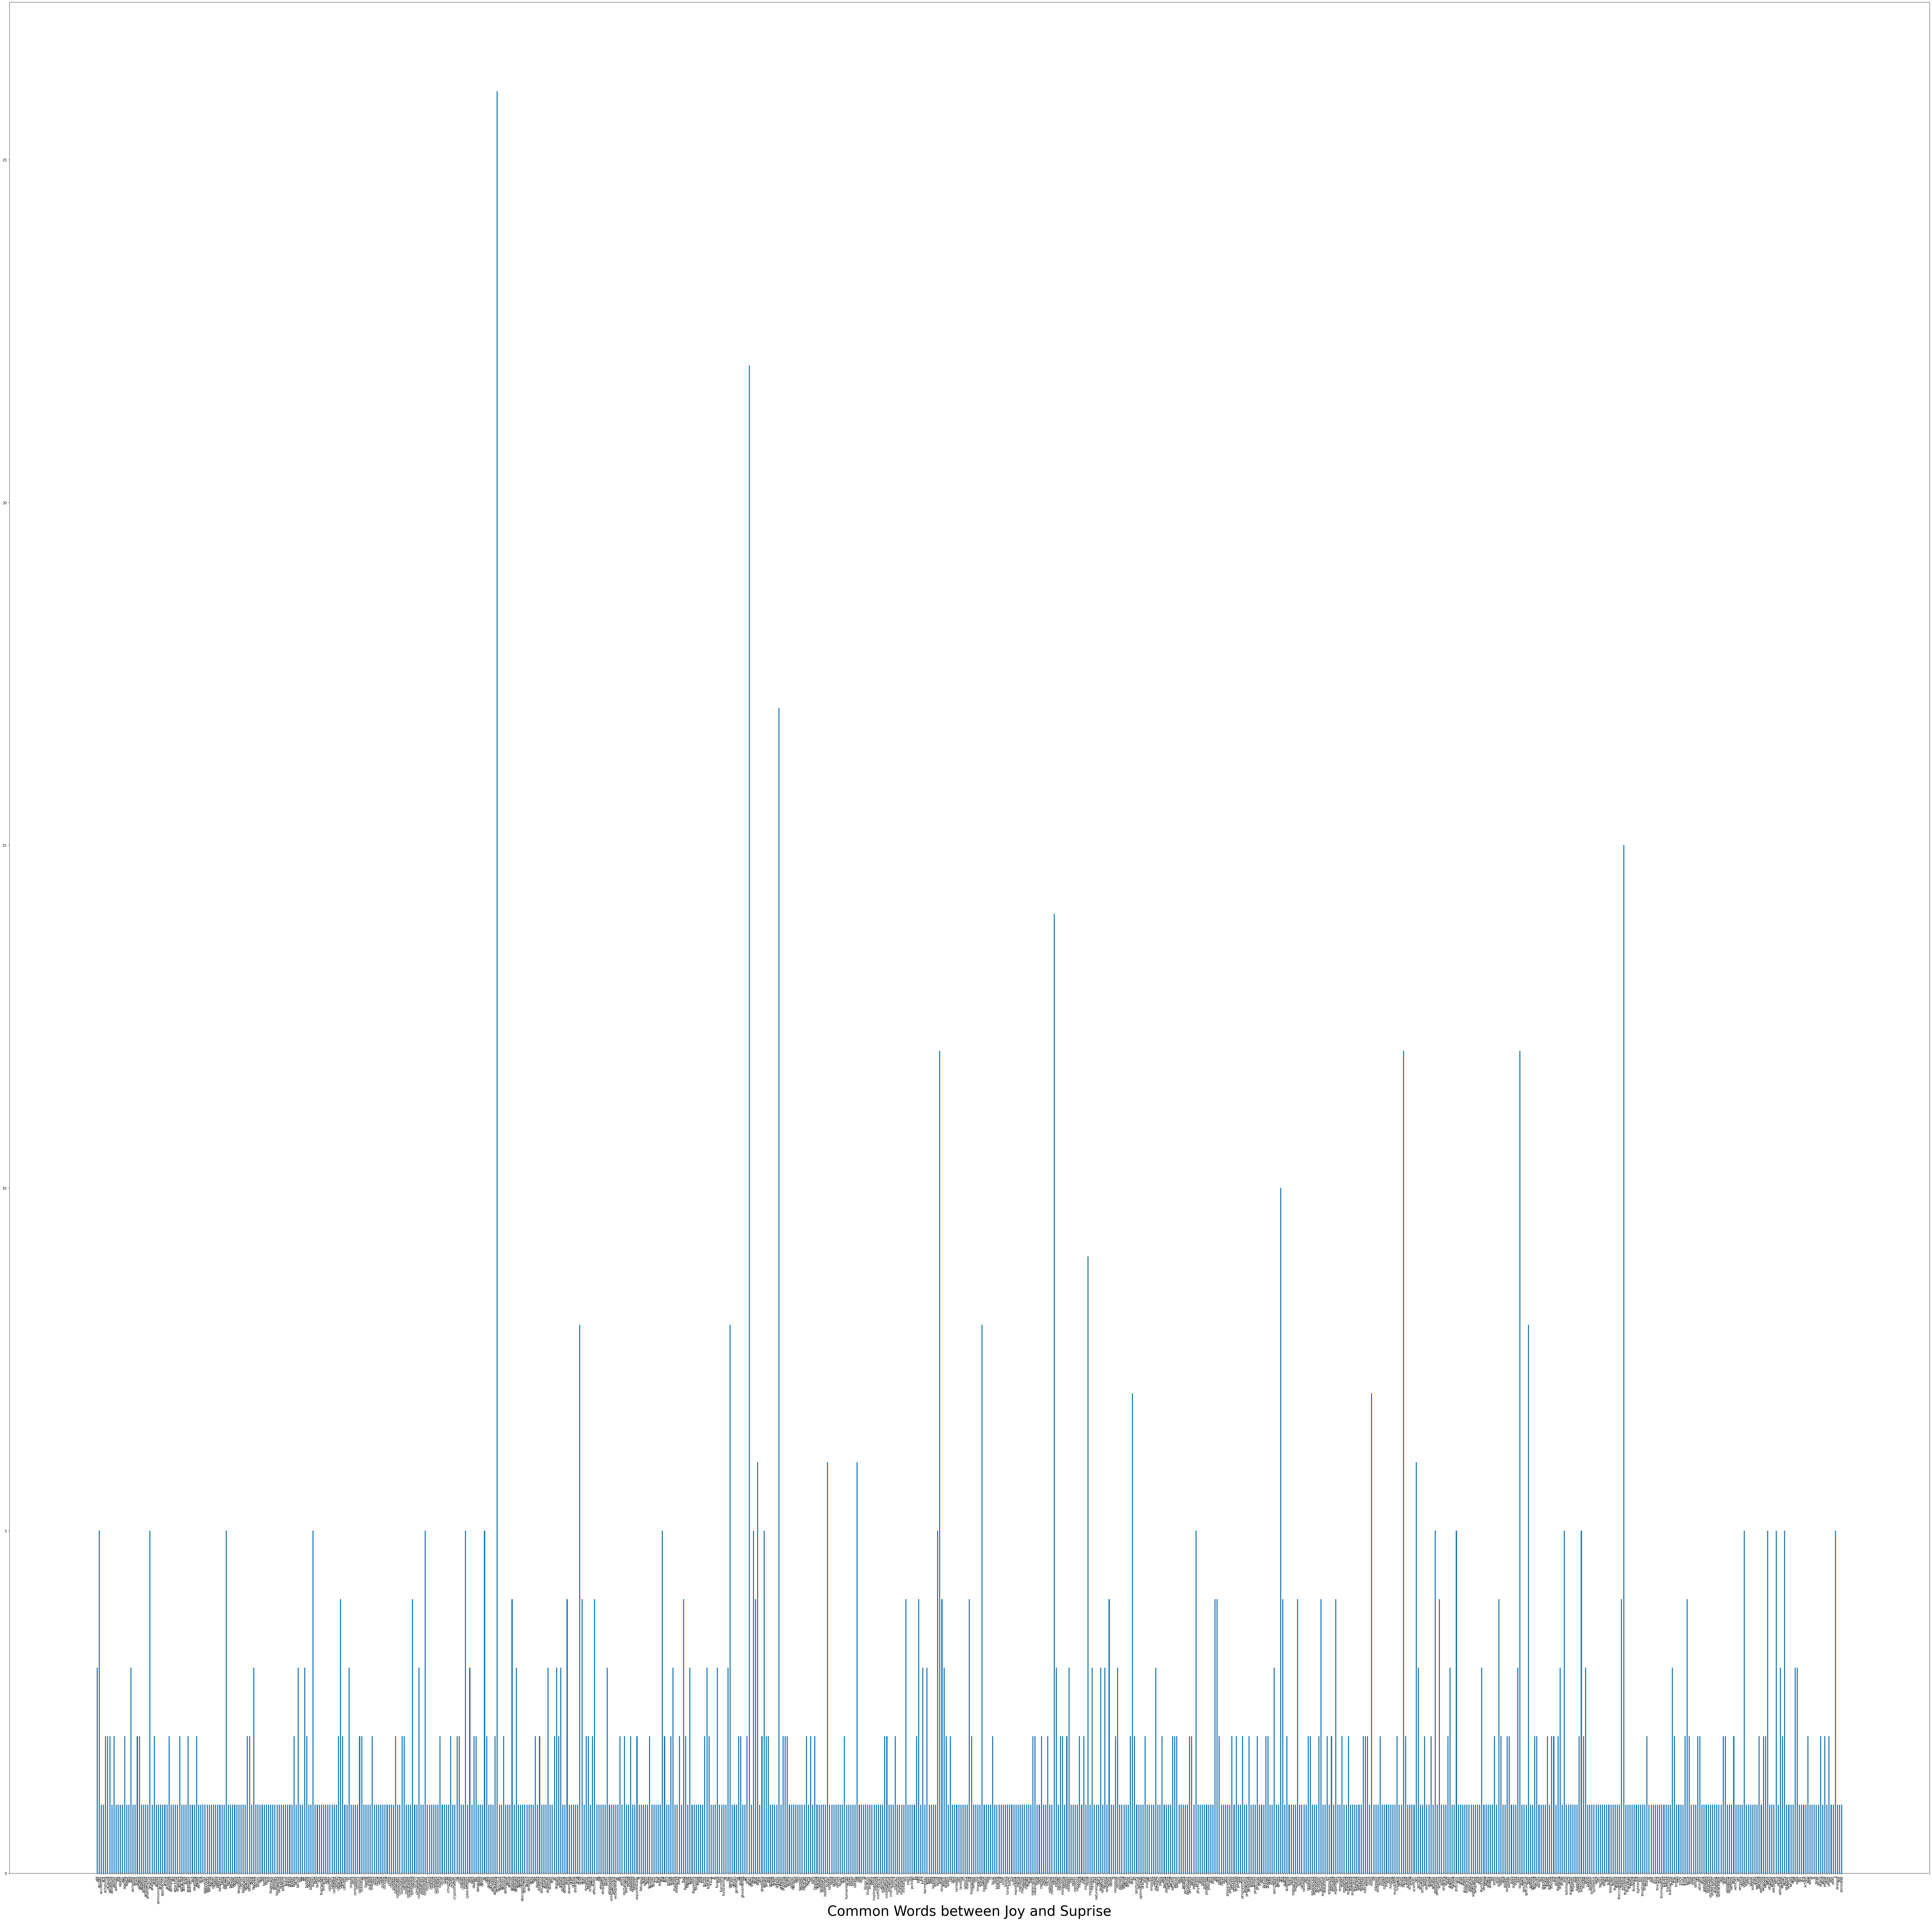

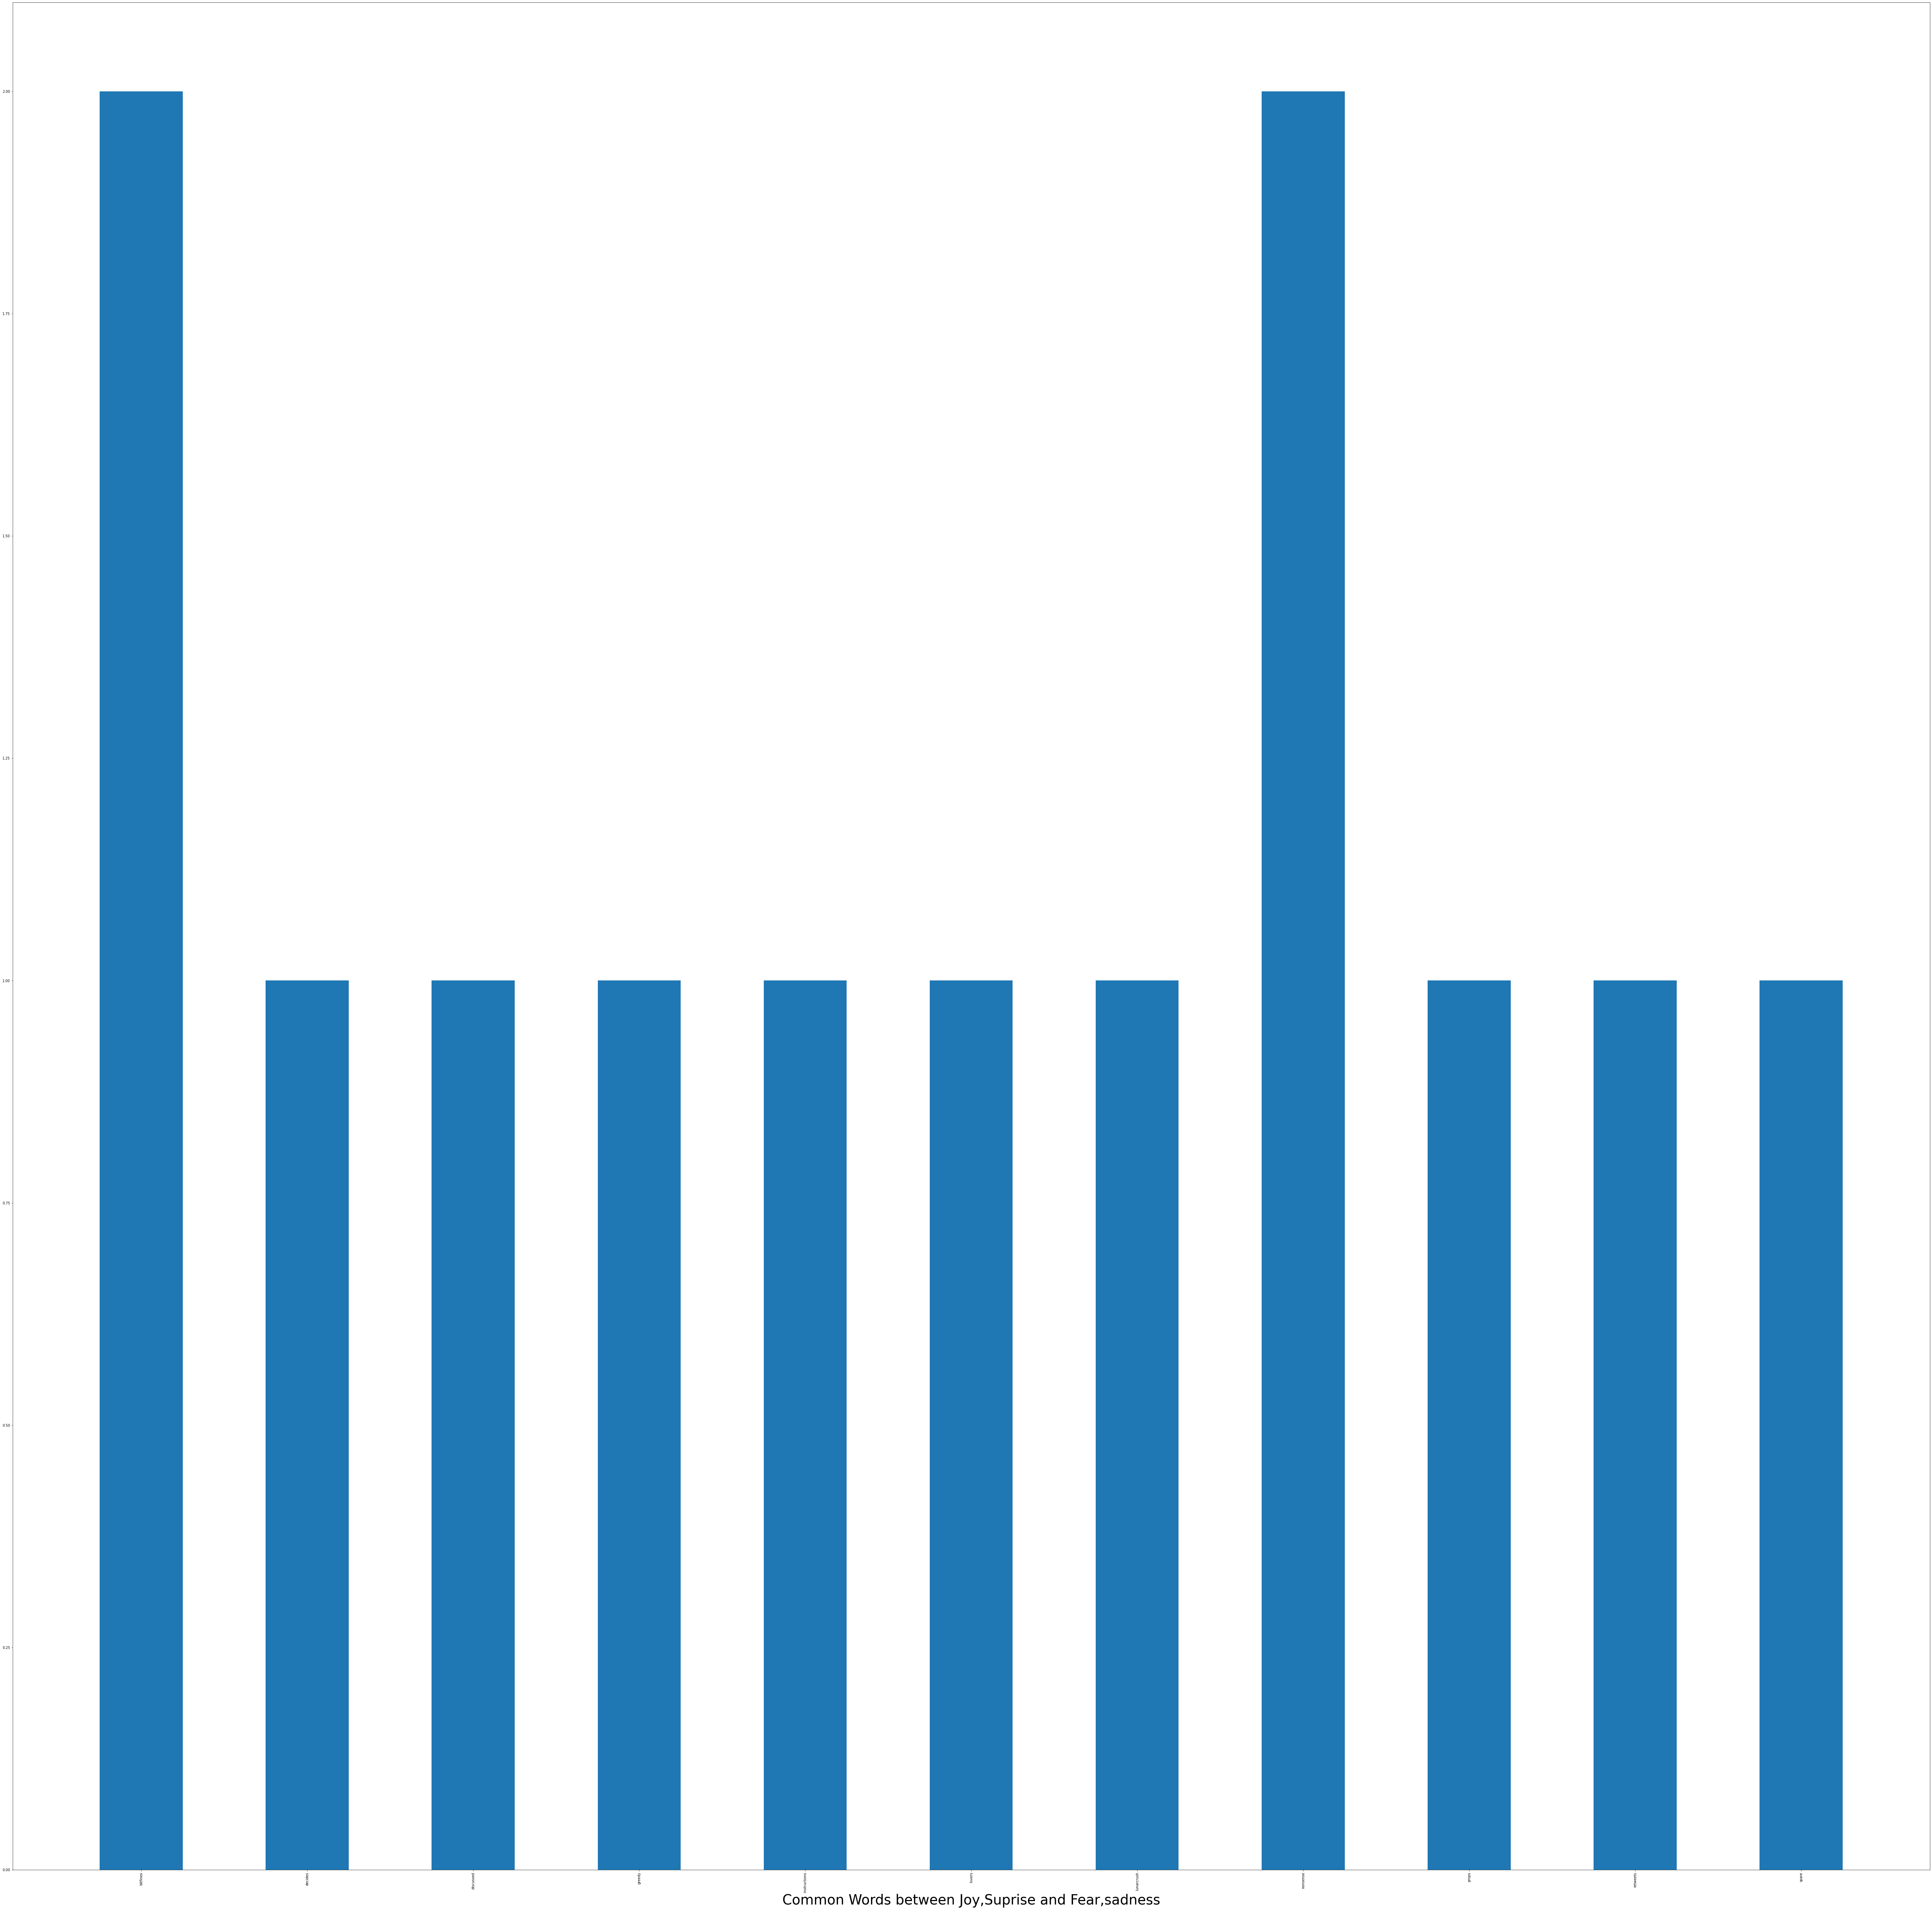

In [28]:
# Plotting Common Words
for i in li2: 
    if (i == "common of all"): #Because there is nothing common in that dataframe else it will throw and error
        pass
    else: 
        df1 = pd.read_csv(i+".csv")
        df1.drop("Unnamed: 0",axis = 1, inplace = True)
        f = plt.figure()
        f.set_figwidth(100)
        f.set_figheight(100)
        plt.bar(df1["0"],df1["1"],width=0.5) #0 is words and 1 is their counts
        plt.xticks(fontsize = "10",rotation = "90")
        plt.xlabel(i,fontsize = "40")
        plt.yticks(fontsize = "10")
        plt.show
        plt.savefig(i)

## Initializing Dataset For Neural Network

### Preparing Dataset For The Model (Data Preprocessing)

In [29]:
# Stemming The Dataset using PorterStemer and making a corpus
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
df['Tweet'] = df['Tweet'].map(lambda text:re.sub('[^a-zA-Z0-9]+', ' ',text)).apply(lambda x: (x.lower()).split())
ps = PorterStemmer()
corpus =df["Tweet"].apply(lambda text_list:' '.join(list(map(lambda word:ps.stem(word),(list(filter(lambda text:text not in set(stopwords.words('english')),text_list)))))))

In [30]:
# Steming every word using SnowballStemmer. 
stemmer = SnowballStemmer("english")
df["Tweet"] = df["Tweet"].apply(lambda x: [stemmer.stem(y) for y in x]) 

In [31]:
#Vectorizing The Corpus
cv = CountVectorizer()
words_vectorized = cv.fit_transform(corpus).toarray()

In [32]:
#Encoding the Emotions
le = preprocessing.LabelEncoder()
emotions =le.fit_transform(df["Emotion"])

In [33]:
# Splitting Dataset into 17690:3000 i.e 17690 for training and 3000 for testing
(X_train, y_train) =  words_vectorized[:17690],emotions[:17690]
(X_test, y_test)  = words_vectorized[:3000],emotions[:3000]

In [34]:
#Checking the size of training and testing data
print("Length of X_train:",len(X_train))
print("Length of X_test:",len(X_test))
print("Length of y_train:",len(y_train))
print("Length of y_test:",len(y_test))

Length of X_train: 17690
Length of X_test: 3000
Length of y_train: 17690
Length of y_test: 3000


### Using Keras.Sequential Neural Network

In [35]:
#Designing Architecture of Neural Network
model = keras.Sequential([
    keras.layers.Dense(13794,input_shape = (12376,), activation='relu'),
   
    keras.layers.Dense(6, activation = 'softmax'),
])

2022-04-24 17:50:22.589252: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-24 17:50:22.589275: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-24 17:50:22.589289: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Jammy): /proc/driver/nvidia/version does not exist
2022-04-24 17:50:22.589448: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [36]:
#Compiling Neural Network
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
#Training Neural Network
model.fit(X_train, y_train, epochs = 32)

Epoch 1/32
553/553 [==============================] - 238s 430ms/step - loss: 1.1379 - accuracy: 0.5385
Epoch 2/32
553/553 [==============================] - 239s 433ms/step - loss: 0.6703 - accuracy: 0.7469
Epoch 3/32
553/553 [==============================] - 241s 435ms/step - loss: 0.3391 - accuracy: 0.8882
Epoch 4/32
553/553 [==============================] - 241s 436ms/step - loss: 0.2495 - accuracy: 0.9213
Epoch 5/32
553/553 [==============================] - 242s 438ms/step - loss: 0.1982 - accuracy: 0.9355
Epoch 6/32
553/553 [==============================] - 242s 438ms/step - loss: 0.1731 - accuracy: 0.9425
Epoch 7/32
553/553 [==============================] - 243s 439ms/step - loss: 0.1629 - accuracy: 0.9439
Epoch 8/32
553/553 [==============================] - 244s 441ms/step - loss: 0.1610 - accuracy: 0.9471
Epoch 9/32
553/553 [==============================] - 242s 438ms/step - loss: 0.1490 - accuracy: 0.9486
Epoch 10/32
553/553 [==============================] - 243s 439m

In [ ]:
#Predicitng probabilities
pred = model.predict(X_test)

In [ ]:
#Making a list for maximum prbability index
y_pred = []
for i in pred:
    y_pred.append(np.argmax(i))

In [ ]:
#Testing Accuracy
accuracy_score(y_test,y_pred)

In [ ]:
# Saving the neural network
model.save("EmotionNeuralNetwork")